# Serie 11
## Aufgabe 11.1
In dieser Aufgabe verwenden wir den Datensatz Auto, der in der Bibliothek `ISLR` enthalten ist.

In [1]:
# install.packages("ISLR") # only once
library(ISLR)

a) Untersuchen Sie den Datensatz mit `head(Auto)` und `?Auto`.

In [2]:
head(Auto)
?Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


Auto {ISLR},R Documentation


b) Stellen Sie das Modell für eine einfache lineare Regression mit mpg als Zielvariable und horsepower als Prädiktor auf.


$mpg \approx \beta_0 + \beta_1 * horsepower$

c) Verwenden Sie den `lm()`-Befehl um diese Regression durchzuführen.

In [3]:
lmMH <- lm(Auto$mpg ~ Auto$horsepower)
# alternative: lm(mpg ~ horsepower, data = Auto)
lmMH


Call:
lm(formula = Auto$mpg ~ Auto$horsepower)

Coefficients:
    (Intercept)  Auto$horsepower  
        39.9359          -0.1578  


In [4]:
summary(lmMH)


Call:
lm(formula = Auto$mpg ~ Auto$horsepower)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     39.935861   0.717499   55.66   <2e-16 ***
Auto$horsepower -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


i) Gibt es einen Zusammenhang zwischen der Zielgrösse und dem Prädiktor?

Ja der $p$-Wert ist fast 0 - die Nullhypthese ($\beta_1=0$) wird verworfen; je mehr Pferdestärken ein Auto hat, umso weniger weit kann man fahren pro Gallone.

ii) Wie interpretieren Sie die Koeffizienten für `intercept` und `horsepower`? Ist der Zusammenhang positiv oder negativ?

Der Intercept von 39.94 für 0PS ist natürlich hier unsinnig. Die Steigung ist negativ, weil die Reichweite durch die Zunahme der Pferdestärken abnimmt.

iii) Bestimmen Sie die Vertrauensintervalle (mit `confint()`) und interpretieren Sie diese?

In [5]:
confint(lmMH, level=0.95)

,2.5 %,97.5 %
(Intercept),38.525212,41.3465103
Auto$horsepower,-0.170517,-0.1451725


Für das 95%-Vertrauensintervall $\beta_0$ gilt $[38.525,41.347]$ und $\beta_1$ gilt $[-0.171,-0.145]$. Die Intervalle sind recht *schmal*, weshalb die Aussagekraft relativ gross ist.

iv) Interpretieren Sie den $R^2$-Wert.

In [6]:
#names(summary(lmMH)) # names gibt output parameter zurück, welche via $ abgefragt werden können
summary(lmMH)$r.squared

[1] 0.6059483

Der $R^2$-Wert ist zwar näher bei 1 als bei 0, beschreibt das Modell aber nicht ganz zuverlässig. Er gibt an, dass die Variabilität zu 60% durch das Modell erklärt wird.

d) Plotten Sie die Zielvariable und den Prädiktor mit der Regressionsgeraden `(abline)`. Wie interpretieren Sie diesen Plot im Vergleich zum `summary()`-Output.

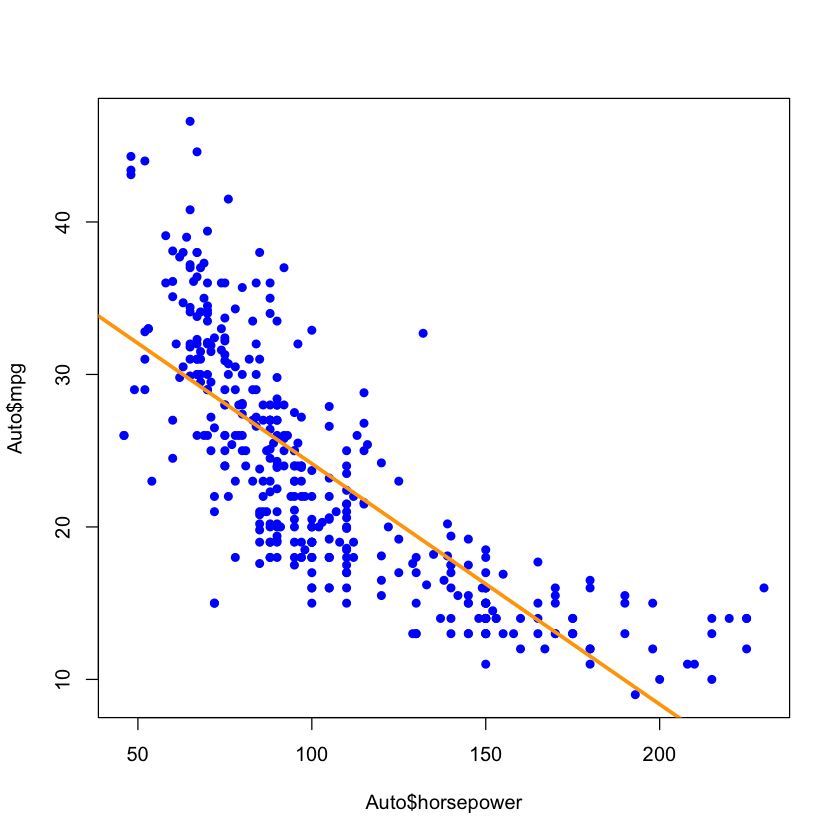

In [7]:
plot(Auto$horsepower,Auto$mpg, col="blue",pch=16)
abline(lmMH,col="orange",lwd=3)

## Aufgabe 11.2
Die `MASS`-Bibliothek enthält den `Boston`-Datensatz, der `medv` (median house value) für 506 Stadtviertel um Boston herum erfasst. Wir werden versuchen, `medv` mit 13 Prädiktoren wie **rm** (durchschnittliche Anzahl von Zimmern pro Haus), **age** (Durchschnittsalter der Häuser) und **lstat** (Prozent der Haushalte mit niedrigem sozioökonomischen Status) vorherzusagen.

a) Um mehr über den Datensatz zu erfahren, können wir `?Boston` oder `help` (Boston) eingeben. Laden Sie zuerst die `MASS`-Bibliothek.

In [8]:
library(MASS)
?Boston
#help(Boston)

Boston {MASS},R Documentation


b) Welche Spaltennamen sind verfügbar?

In [9]:
colnames(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

c) Mit dem `attach(...)`-Befehl können wir `R` die Spaltennamen des Datensatzes Boston erkennen lassen.

In [10]:
attach(Boston)

d) Wir werden damit beginnen, die `lm()`-Funktion zu verwenden, um ein einfaches lineares Regressionsmodell mit **medv** als Antwort und **lstat** als Prädiktor anzupassen.

i) Definieren Sie das einfache Regressionsmodell unter Verwendung der beiden obigen Variablen.

$medv = \beta_0 + \beta_1 * lstat$

ii) Die grundlegende Syntax lautet `lm(y~x,data)` Dabei ist `y` die Antwort, `x` der Prädiktor und `Daten` der Datensatz, in dem diese beiden Variablen enthalten sind.

In [11]:
lm.fit <- lm(medv ~lstat, Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


e) Wir können die Funktion `names(...)` verwenden, um herauszufinden, welche anderen Informationen in `lm.fit` gespeichert sind.

In [12]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"


f) Obwohl wir diese Grössen über den Namen zugreifen können (beispielsweise `lm.fit$coefficients`), ist es sicherer, Funktionen wie `coef(...)` zu verwenden, um auf sie zuzugreifen.

Interpretieren Sie diese Werte und die entsprechenden p–Werte in der obigen Zusammenfassung.

In [13]:
lm.fit$coefficients
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

(Intercept)       lstat 
 34.5538409  -0.9500494

Der Print der Zusammenfassung liefert gerundete Werte zurück. Beim Aufruf der Coeffizienten Funktionen werden viel mehr Stellen zurückgegeben. Interpretation; Leben 0% der Menschen im unteren Status der Bevölkerung in der Nachbarschaft liegt der mittlere Hauswert bei $\$34554$. Die Steigung beträgt $-0.95$, für jedes Prozent in der Bevölkerung sinkt der mittlere Hauswert.

g) Um ein Vertrauensintervall für die Koeffizientenschätzungen zu erhalten, können wir den Befehl `confint(...)` verwenden.  

Geben Sie eine Interpretation dieser Werte an.

In [14]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


Mit 95% Wahrscheinlichkeit liegt das wahre $\beta_0$ liegt zwischen $[33.45,35.66]$ und $\beta_1$ liegt zwischen $[-1.03,-0.87]$. 

h) Wir werden nun **medv** und **lstat** zusammen mit der Regression der kleinsten Quadrate auftragen Zeile mit den Funktionen `plot(...)` und `abline()`.

Verwenden Sie `lty = ...`, `pch = ...` und `col = ...`, um Graphik schöner aussehen zu lassen.

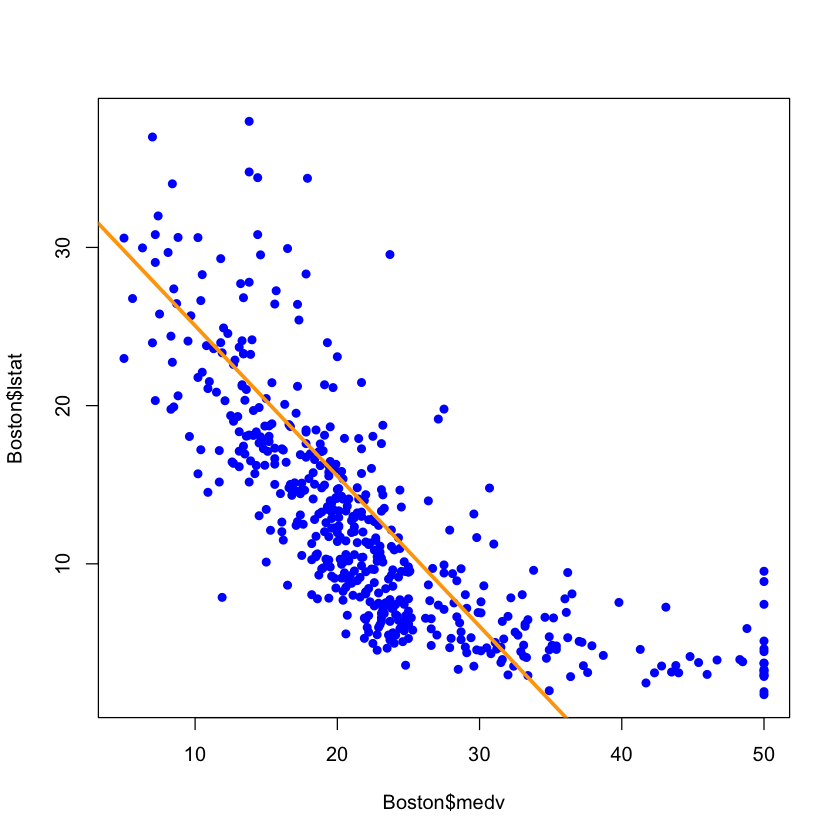

In [15]:
plot(Boston$medv, Boston$lstat,lty="solid",pch=16,col="blue")
abline(lm.fit,lwd=3,col="orange")

i) Interpretieren Sie den Wert $R^2$ in der `summary`–Ausgabe oben.

In [16]:
summary(lm.fit)$r.squared

[1] 0.5441463

Die Variabilität wird zu 55% durch das Modell erklärt.